##Importing Libraries

In [2]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

##Loading the Dataset

In [4]:
# Load the dataset
data = pd.read_csv("Roman Urdu Dataset.tsv", usecols=[0, 1], header=None, sep="\t", names=["Sentiment", "Text"])

In [5]:
data.head()

,Sentiment,Text
0,neg,ab achanak khawaja saad rafique ko khiyaal aa...
1,neg,"adha drama to censor hi hojaye gaa , khaas to..."
2,neg,bekaar fuzool end !!!!! moti budhi laila jeet...
3,neg,choor kasuri choor jhootay ka moo kaala
4,neg,gali gali mein shor hai gaaanjaaaa shair chor...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  11000 non-null  object
 1   Text       11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [7]:
data.isna().sum()

Sentiment    0
Text         0
dtype: int64

##Data Pre-processing

In [8]:
# Convert pos and neg to Positive and Negative
def convert_sentiment(sentiment):
    if sentiment == "pos":
        return "Positive"
    elif sentiment == "neg":
        return "Negative"
    else:
        return sentiment

data["Sentiment"] = data["Sentiment"].apply(convert_sentiment)

In [9]:
data.head()

,Sentiment,Text
0,Negative,ab achanak khawaja saad rafique ko khiyaal aa...
1,Negative,"adha drama to censor hi hojaye gaa , khaas to..."
2,Negative,bekaar fuzool end !!!!! moti budhi laila jeet...
3,Negative,choor kasuri choor jhootay ka moo kaala
4,Negative,gali gali mein shor hai gaaanjaaaa shair chor...


In [10]:
with open('stopwords.txt', 'r') as file:
    text = file.read() # read the contents of the file into a string variable
    stop_words_list = text.split() # split the string into a list of words
    
print(stop_words_list) # display the resulting list

['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']


In [11]:
# Clean the data by removing non-alphabetic characters and converting to lowercase
data["Text"] = data["Text"].str.lower()
data["Text"] = data["Text"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [12]:
# Tokenize the text data into words
data["Text"] = data["Text"].apply(lambda x: word_tokenize(x))

In [13]:
# Remove stopwords from the tokenized words
data["Text"] = data["Text"].apply(lambda x: [word for word in x if word not in stop_words_list])

In [14]:
# Perform lemmatization and POS tagging on the tokenized words
lemmatizer = WordNetLemmatizer()
data["Text"] = data["Text"].apply(lambda x: [(lemmatizer.lemmatize(word), pos) for word, pos in nltk.pos_tag(x)])

# Join the lemmatized words back into sentences
data["Text"] = data["Text"].apply(lambda x: " ".join([word for word, pos in x]))

##Creating and Training Naive Bayes Model

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["Text"], data["Sentiment"], test_size=0.2, random_state=42)

# Convert the text data into feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


In [16]:
# Train a Naive Bayes classifier on the training set
clf = MultinomialNB()
clf.fit(X_train_vectors, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test_vectors)

##Testing the Model

In [17]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.73%


In [18]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.77      0.79      1067
    Positive       0.79      0.83      0.81      1133

    accuracy                           0.80      2200
   macro avg       0.80      0.80      0.80      2200
weighted avg       0.80      0.80      0.80      2200



In [19]:
#Creating the Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[819 248]
 [198 935]]


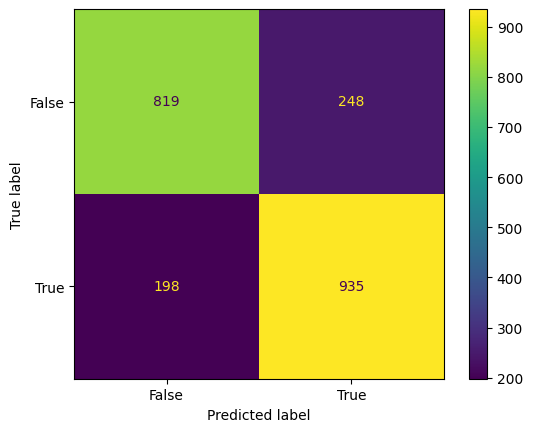

In [20]:
#Plotting the Result
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
#True Negative (Top-Left Quadrant)
#False Positive (Top-Right Quadrant)
#False Negative (Bottom-Left Quadrant)
#True Positive (Bottom-Right Quadrant)

##Testing the Model with User Inputs

In [21]:
# Get user input
user_text = input('Enter some Roman Urdu text: ')
# Convert the user input into numerical features using the same vectorizer used for the training data
user_counts = vectorizer.transform([user_text])
# Predict the sentiment label of the user input
user_sentiment = clf.predict(user_counts)[0]
# Display the sentiment label of the user input
print('Sentiment:', user_sentiment)

Enter some Roman Urdu text: Mausam accha nahi hei
Sentiment: Positive
